<a href="https://colab.research.google.com/github/uol-mediaprocessing-2023-2024-classroom/project-interaction-by-facial-expressions/blob/develop/documentation/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentation: Interaction by Facial Expression
**Group members:** Lea Krawczyk​, Thi Mai Linh Nguyen​, Sebastian Vittinghoff​

**Last update:** 21.11.2023


# Main concept

Our goal is to develop an application that makes it possible to take photos using a webcam and save them into a gallery. This gallery can be navigated by using gestures and facial expressions. In addition, the user should be able to apply different filters to the photos. These filters should be triggered by certain gestures and facial expressions. We refer to the gestures and facial expressions as **commands**.

## Example of commands

As of now we decided to implement the following commands to our project.

### Navigation:

* “Go to next photo” &rarr; Close your right eye​
* “Go to previous photo” &rarr; Close your left eye​

### Actions:

* “Take a photo” &rarr; Connect thumb and index finger​
* “Undo” &rarr; Close both eyes

### Filters:
* “Blur Image” &rarr; Hold hand in front of eyes​
* “Invert” &rarr; Thumbs down​
* “Black and white” &rarr; Peace sign


## GUI wireframe
As we settled on our commands we created a wireframe of the frontend of our project.

The main area features a webcam view right in the middle of the screen. We decided to place the webcam view in the middle since the user tends to look at the webcam view rather than the webcam itself which is usually placed in the middle at the top of the screen. This way we can track the eye movements more accurately.
There is a smaller view in the top right corner of the webcam view which shows the photo taken. At the bottom of the webcam view there is a camera button which takes a photo if pressed. As of now we are still testing the implementations of our commands so there is a camera button to take a photo. However we are going to remove it once the command which is triggered by facial expressions is fully functional.

On the right side of the webcam view there is a command log which shows the last five commands done by the user. On the left side of the webcam view there is going to be a "Help" symbol which will show the possible command inputs if the user clicks on it.

Below the webcam view there is going to be an area to modify a photo by applying filters. On both sides of the modifying area there are going to be previews of the next photo in the album and the previous photo. Below the modifying area there is an undo button to rollback on changes to the photo.

If the user scrolls further down the user can view all of their photos in a gallery. There is going to be an area as well where the user can upload their photos which can be modified as well.

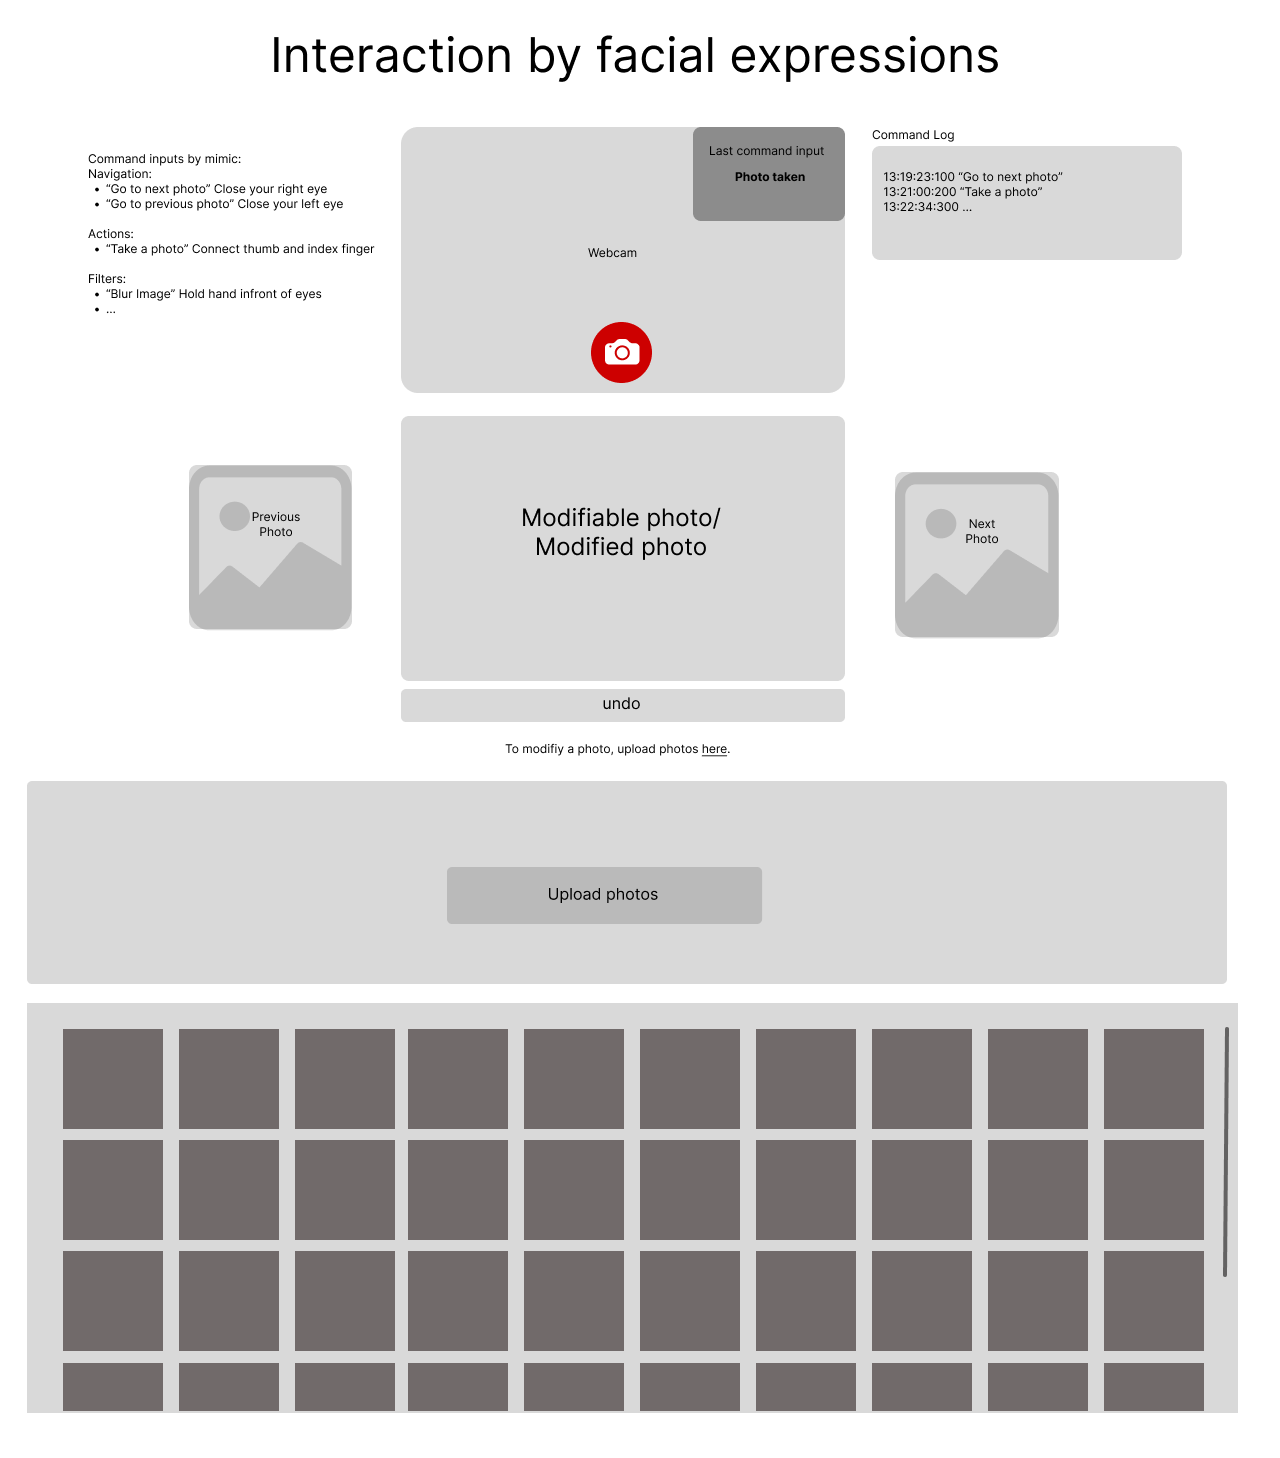

# Base Project (22.11.2023)
## GUI
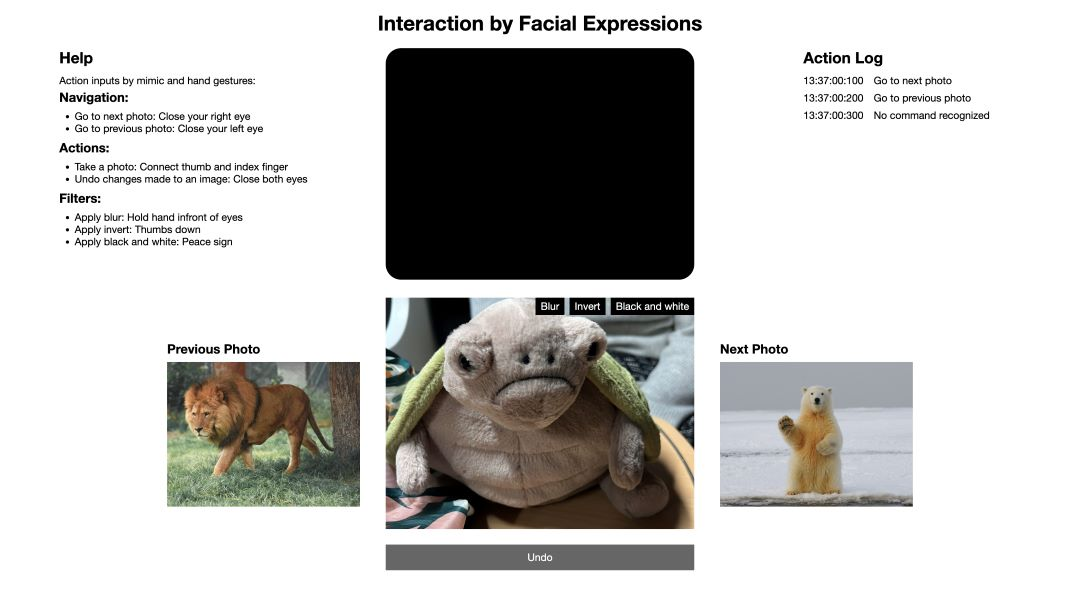

This is the current GUI as of the 22.11.2023. For now we added buttons for the filters above the modifying area to apply filters manually. Once it is possible to recognize gestures we are going to remove the buttons so the user can apply filters by commands.

## Filters
### Black and white (Thresholding)
In order to create a filter that converts an image into grayscale or in the colors black and white we used [Image Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html).

**cv2.threshold(img, 25, 255, cv2.THRESH_TOZERO)**

The method can be explained as followed:
- **img**: The image in grayscale.
- **Second argument**: The pixel value threshold.
- **Third argument**: the maximum value the image can have later. The value 255 is white.
- **cv2.THRESH_TOZERO**: The type of thresholding. This type will use the second argument (for e.g. 25) and sets every pixel that has a lower value than the second argument to 0 (black). However values above the seconde argument will remain in grayscale

Another type we tried out was **cv.THRESH_BINARY**. This type would turn every pixel with a lower value than the threshold to 0 (black) and everything above to 255 (white) so the image would strictly consist of black or white pixels.

Different black and white filters of [this image](https://github.com/uol-mediaprocessing-2023-2024-classroom/class_materials/blob/main/pictures/Lenna.png) may look like this:


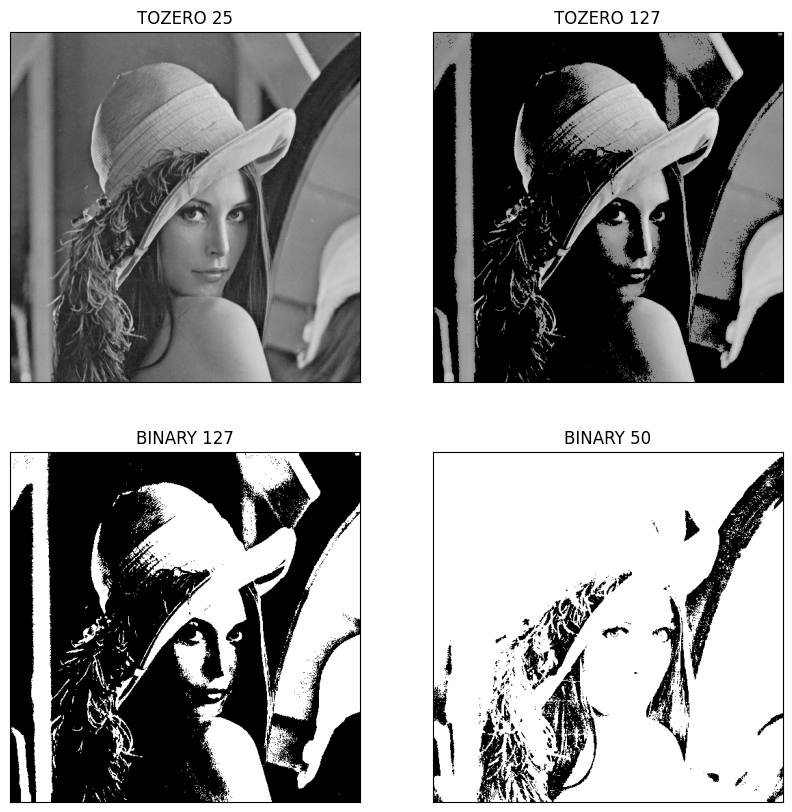

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
plt.rcParams["figure.figsize"] = (10, 10)
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/notebooks/master/pictures/Lenna.png
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_TOZERO)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
titles = ['TOZERO 25','TOZERO 127','BINARY 127','BINARY 50']
images = [thresh1, thresh2, thresh3, thresh4]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Progress

This section gives a brief summary of the progress of this project up to a specific date.

## 08.11.2023

The main focus was to organise our group and come to an agreement regarding the concept and requirements of our project.

In order to keep track of our tasks and work distribution we decided to use an online project organization tool called [Trello](https://trello.com).
We collectively decided to work on our own implementations of the frontend and backend. The structure of our repository includes a frontend, backend and documentation folder. We are going to use PyCharm as our main IDE.

After the basic setup was completed we discussed our goals for this project and which requirements to implement (refer to [Main concept](#main-concept)).

## 22.11.2023

We created a basis for our project. In the backend we added the filters "blur", "black and white" and "inverted" and on the frontend we added a webcam, the help section, an action log and an area to modify the photos. Generally we experimented with filters of OpenCV and adjusted the parameters to our liking. As of now we can only apply the filters on example images in the modifying area. It's not possible to upload a photo yet. Furthermore there is no gallery implemented yet.